In [1]:
import pandas as pd
import datetime
import timeit
import openpyxl
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import os
#%matplotlib inline

In [2]:
#columns = ['Year',
#           'Month',
#           'Day',
#           'Customer',
#           'Customer Type',
#           'Product',
#           'Purchasing_Platform',
#           'Sell Price',
#           'USD Cost',
#           'CNY Cost',
#           'Cashback',
#           'Profit',
#           'Profit Rate',
#           'Payment method',
#           'Comment']
#df = pd.DataFrame(columns = columns)

In [3]:
def insert(df):
    d = datetime.datetime.today()
    Year = d.strftime('%Y')
    Month = d.strftime('%m')
    Day = d.strftime('%d')
    Customer = str(input("Enter Customer: ")or str('None'))
    Customer_Type = str(input("Enter Customer Type: ")or str('None'))
    Product = str(input("Enter Product: ")or str('None'))
    Purchasing_Platform = str(input("Enter Purchasing_Platform: ") or str('None'))
    Sell_Price = float(input("Enter Sell Price: ") or float(0))
    USD_Cost = float(input("Enter USD Cost($): ") or float(0)) 
    CNY_Cost = float(input("Enter CNY Cost(￥): ") or float(0)) 
    Cashback = float(input("Enter Cashback: ") or float(0))
    Profit = Sell_Price - CNY_Cost + Cashback
    Profit_Rate = Profit / Sell_Price
    Payment_method = str(input("Enter Payment method: ") or str('None'))
    Comment = str(input("Enter Comment: ") or str('None'))
    print("插入的新数据为：")
    temp = pd.DataFrame([[Year,Month,Day,Customer,Customer_Type,Product,Purchasing_Platform,Sell_Price,
                        USD_Cost,CNY_Cost,Cashback,Profit,Profit_Rate,Payment_method,Comment]],
                        columns = columns)
    print(temp)
    df.loc[len(df)] = temp.loc[0]
    return df

In [4]:
def delete(df,row_num):
    df = df.drop([row_num], axis = 0)
    return df.reset_index(inplace = False,drop = True)

In [5]:
def Export(df,filename):
    df.to_excel('out'+filename,encoding="utf-8-sig")
    return

In [6]:
def Import():
    files = [f for f in os.listdir('.') if (os.path.isfile(f) and f[-4:] == 'xlsx')]
    for filename in files:
        try:
            df = pd.read_excel(filename,index_col=0)
            df[['Sell Price','Profit','Profit Rate','CNY Cost','Cashback']] = df[['Sell Price','Profit','Profit Rate','CNY Cost','Cashback']].fillna(float(0))
            df['Profit'] = df['Sell Price']-df['CNY Cost']+df['Cashback']
            df['Profit Rate'] = df['Profit']/df['Sell Price']
            df[['Year','Month','Day']] = df[['Year','Month','Day']].fillna(method='ffill')
            df[['Year']]=df[['Year']].astype(int).astype(str).apply(lambda x: x.str.zfill(4))
            df[['Month','Day']]=df[['Month','Day']].astype(int).astype(str).apply(lambda x: x.str.zfill(2))
            print("Reading file: "+filename)
        except:
            pass
    return df.reset_index(inplace = False,drop = True),filename

In [7]:
def daily_profit(df,day):
    try:
        df = df[df['Year'] == day[0:4]]
        df = df[df['Month'] == day[5:7]]
        df = df[df['Day'] == day[8:10]]
        return sum(df['Profit'])
    except:
        print("[daily_profit] Enter format yyyy-mm-dd: ")
        return

In [8]:
def daily_volume(df,day):
    try:
        df = df[df['Year'] == day[0:4]]
        df = df[df['Month'] == day[5:7]]
        df = df[df['Day'] == day[8:10]]
        return sum(df['Sell Price'])
    except:
        print("[daily_volume]Enter format yyyy-mm-dd: ")
        return

In [9]:
def daily_profit_rate(df,day):
    try:
        volume = daily_volume(df,day)
        profit = daily_profit(df,day)
        return profit/volume
    except:
        print("[daily_profit_rate]Enter format yyyy-mm-dd: ")
        return

In [10]:
def monthly_profit(df,month):
    try:
        df = df[df['Year'] == month[0:4]]
        df = df[df['Month'] == month[5:7]]
        return sum(df['Profit'])
    except:
        print("Enter format yyyy-mm: ")
        return

In [11]:
def yearly_profit(df,year):
    try:
        df = df[df['Year'] == year]
        return sum(df['Profit'])
    except:
        print("Enter format yyyy: ")
        return

In [12]:
def daily_summary(df,plot_type):
    summary = []
    day = []
    day_df = pd.DataFrame()
    day_df['Date'] = pd.to_datetime(df[['Year','Month','Day']], format="%Y%m%d")
    length = len(day_df)-1
    start_date = day_df.loc[0]['Date']  # start date
    end_date = day_df.loc[length]['Date'] # end date
    delta = end_date - start_date         # timedelta

    for i in range(delta.days + 1):
        #print((start_date + timedelta(days=i)).strftime('%Y-%m-%d'))
        day.append((start_date + timedelta(days=i)).strftime('%m-%d'))
        if plot_type == 'Profit':
            summary.append((daily_profit(df,(start_date + timedelta(days=i)).strftime('%Y-%m-%d'))))
        elif plot_type == 'Volume':
            summary.append((daily_volume(df,(start_date + timedelta(days=i)).strftime('%Y-%m-%d'))))
        elif plot_type == 'Profit Rate':
            summary.append((daily_profit_rate(df,(start_date + timedelta(days=i)).strftime('%Y-%m-%d'))))
    get_plot(day,summary,plot_type)

In [13]:
def get_plot(day,data,plot_type):
    fig = plt.figure(dpi=200)
    plt.title("Daily "+plot_type)
    plt.xlabel('Date')
    plt.ylabel(plot_type)
    plt.plot(day, data, '--o', alpha = 0.7)
    for x, y in zip(day, data):
        plt.text(x, y, str("%.2f" % y), color="#0abab9", alpha = 0.5, fontsize=10)
    plt.xticks(rotation=90, fontsize = 8)
    plt.savefig('Daily_'+plot_type+'.png',quality=100,bbox_inches = 'tight')

Reading file: Transaction_data_7.19.xlsx
生成图表完毕，请按任意键退出。


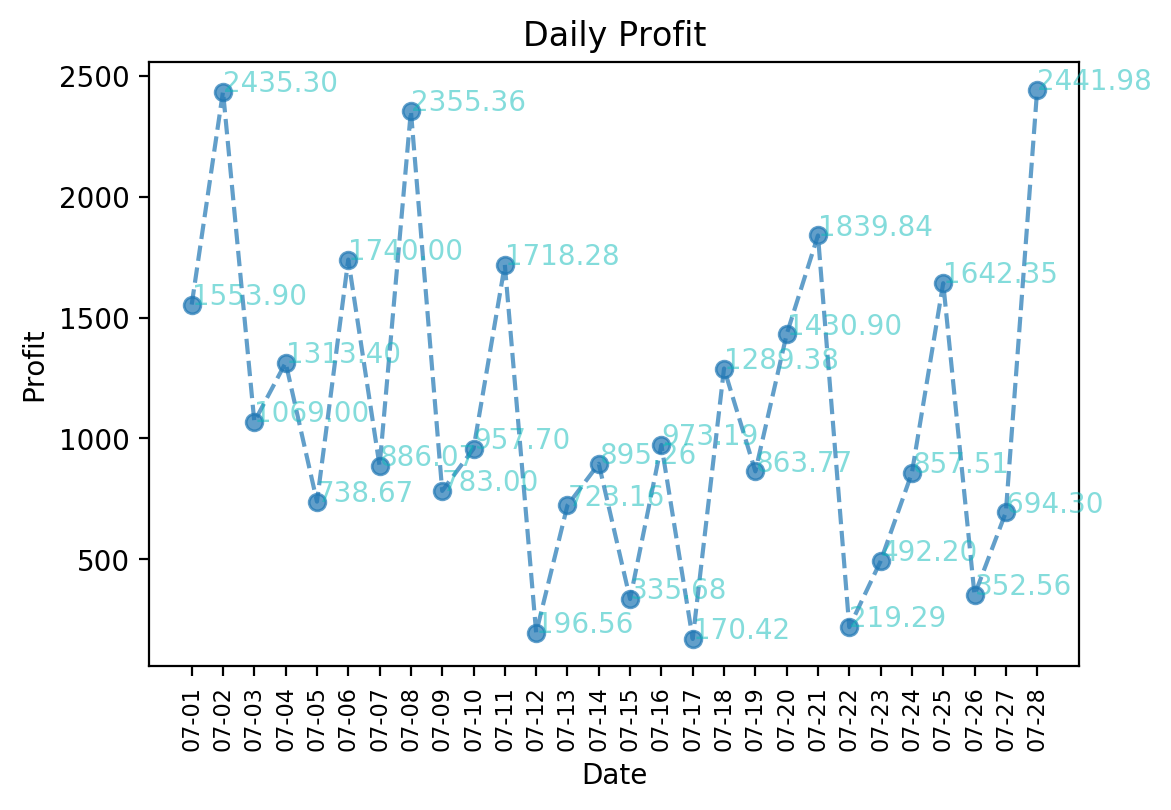

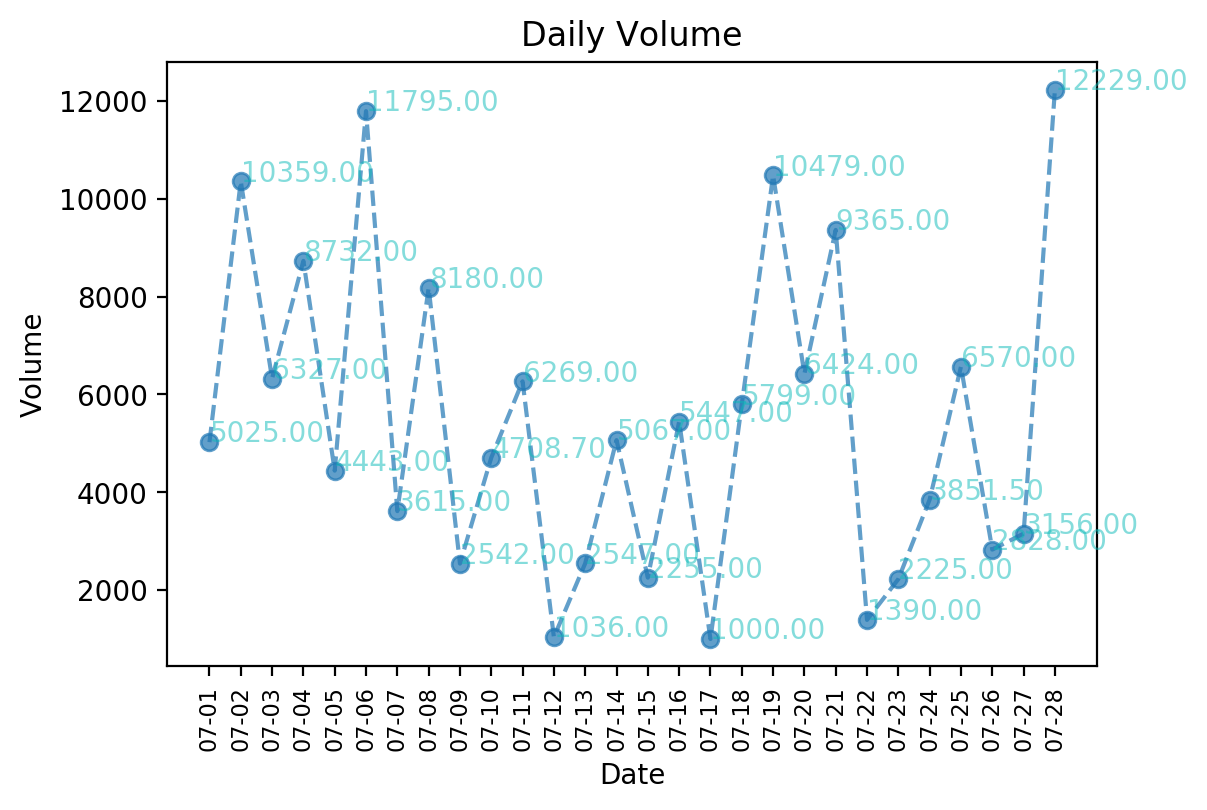

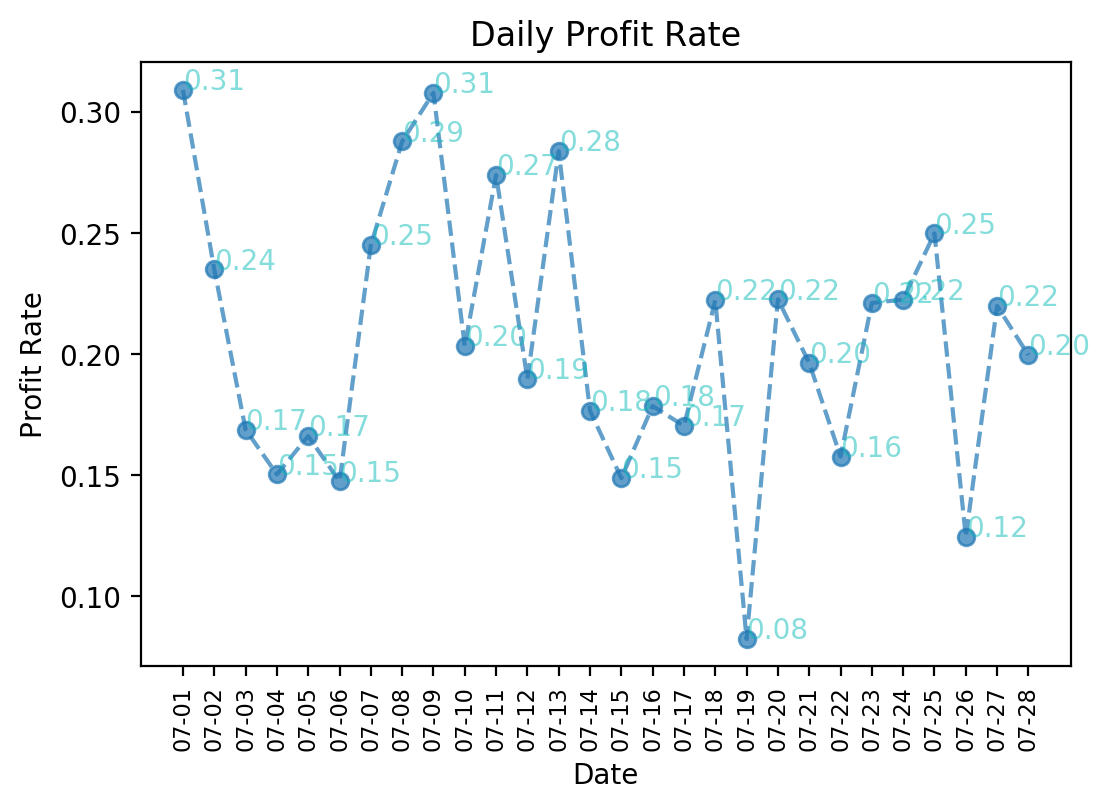

In [18]:
def main():
    df,filename = Import()
    Export(df,filename)

    daily_summary(df,"Profit")
    daily_summary(df,"Volume")
    daily_summary(df,"Profit Rate")
    input("生成图表完毕，请按任意键退出。")

if __name__ == "__main__":
    main()